In [1]:
#Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [2]:
data=pd.read_csv('spam_detection_dataset.csv')

In [3]:
data.head()

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
0,3,98,1,0.718607,0,0
1,0,170,0,0.698901,1,0
2,0,38,0,0.620466,0,0
3,0,116,0,0.701755,0,0
4,3,89,1,0.583621,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_links     20000 non-null  int64  
 1   num_words     20000 non-null  int64  
 2   has_offer     20000 non-null  int64  
 3   sender_score  20000 non-null  float64
 4   all_caps      20000 non-null  int64  
 5   is_spam       20000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 937.6 KB


In [6]:
data.columns

Index(['num_links', 'num_words', 'has_offer', 'sender_score', 'all_caps',
       'is_spam'],
      dtype='object')

In [7]:
data.shape

(20000, 6)

In [9]:
data.sample(3)

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
6093,1,73,0,0.788059,0,0
950,1,185,0,0.613795,1,0
17583,3,100,0,0.740498,1,1


In [11]:
#Select Features and Labels

X=data.drop('is_spam',axis=1)
y=data['is_spam']

In [12]:
#Splitting data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
#prediction
y_pred=model.predict(X_test)

In [15]:
#Evaluation
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
r=recall_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')

print('Confusion Matrix:')
print(cm)
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'Precision:{precision*100:.2f}%')
print(f'Recall:{r*100:.2f}%')
print(f'F1 score:{f1*100:.2f}%')

Confusion Matrix:
[[3582   49]
 [ 180  189]]
Accuracy:94.27%
Precision:87.31%
Recall:74.94%
F1 score:79.59%


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

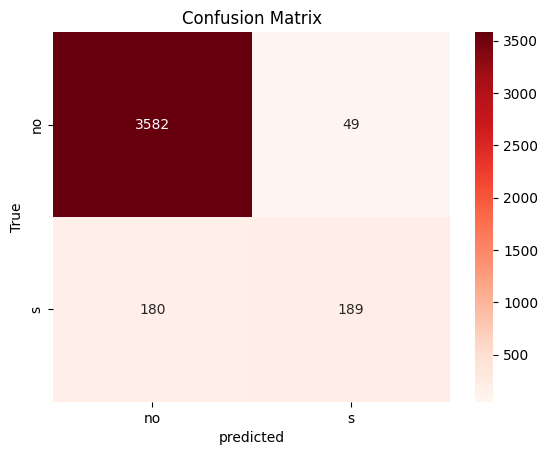

In [ ]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",
            xticklabels=["Ham",'spam'],
            yticklabels=['Ham','spam'])
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()